In [103]:
# importing the data

import pandas as pd

df = pd.read_csv("breast-cancer-wisconsin.csv")

# Summary of results:

# 1. Preprocessing steps:

We have looked at the distribution of target variable and created a count plot to show this, correlation heatmap is also created to understand correlations between variables and we can see that there is high correlation between uniformity_cell_size and uniformity_cell_Shape. The target variable has been recoded to 0 and 1 to facilitate binary classification. Here, to avoid multicollinearity we considered only uniformity cell size and not uniformity cell shape since they have > 0.9 correlation. 

# 2. Prepare the data set by removing outliers and impute missing values and run various models to predict the approval rating

Missing values are removed, though we do not have any null values, we have removed columns with special characters. Outliers are treated using z score, as the thumb rule is 99.97% of the data lies less than 3 standard deviations from the mean

# 3. How do you create train and test data sets for model testing and accuracy?  Show at least 2-3 model approaches for the solution. Which one do you prefer and why? Show the confusion matrix for the accuracy? What are other methods used to show the accuracy?

A. Usedd 80-20 split to create train and test datasets, Built LGBM, Logistic regression, and random forest models to perform binary classification. Looking at the evaluation metrics we could say that random forest is performing better. We have looked at accuracy, precision, recall, and AUC values to choose the best model. 

# 4. What are the predictors from the approved model? Why?

A. the most important variables from the model are Uniformity_CellSize, Bare_nuclei, Bland_Chromatin

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                      699 non-null int64
Clump_Thickness         699 non-null int64
Uniformity_CellSize     699 non-null int64
Uniformity_CellShape    699 non-null int64
MarginalAdhesion        699 non-null int64
SE_CellSize             699 non-null int64
Bare_Nuclei             699 non-null object
Bland_Chromatin         699 non-null int64
N_Nucleoli              699 non-null int64
Mitoses                 699 non-null int64
Result                  699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [105]:
df.tail()

,ID,Clump_Thickness,Uniformity_CellSize,Uniformity_CellShape,MarginalAdhesion,SE_CellSize,Bare_Nuclei,Bland_Chromatin,N_Nucleoli,Mitoses,Result
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [106]:
import numpy as np

# here, we are assuming "+" represents approved
df['Result_Updated'] = np.where(df['Result'] == 4, 1, 0)
df.drop(['ID', 'Result'], axis = 1, inplace = True)

In [107]:
# summaries

df.describe()

,Clump_Thickness,Uniformity_CellSize,Uniformity_CellShape,MarginalAdhesion,SE_CellSize,Bland_Chromatin,N_Nucleoli,Mitoses,Result_Updated
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,0.344778
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.475636
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [108]:
# creating univariate statistics for target variable

df['Result_Updated'].value_counts()

0    458
1    241
Name: Result_Updated, dtype: int64

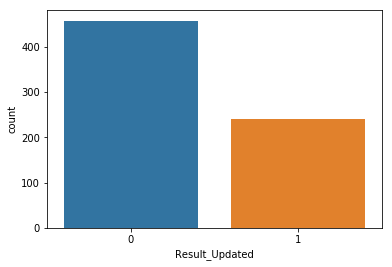

In [109]:
import seaborn as sns
sns.countplot(df['Result_Updated'],label="Count")

In [110]:
# we need to use complete dataset here, df

In [111]:
# from this code we can understand that there are no missing values in the data
df.isnull().all()

Clump_Thickness         False
Uniformity_CellSize     False
Uniformity_CellShape    False
MarginalAdhesion        False
SE_CellSize             False
Bare_Nuclei             False
Bland_Chromatin         False
N_Nucleoli              False
Mitoses                 False
Result_Updated          False
dtype: bool

In [112]:
# here, we need to take additional care for special notations
df = df[df['Bare_Nuclei'] != '?']

In [113]:
df.shape

(683, 10)

In [114]:
df.corr()

,Clump_Thickness,Uniformity_CellSize,Uniformity_CellShape,MarginalAdhesion,SE_CellSize,Bland_Chromatin,N_Nucleoli,Mitoses,Result_Updated
Clump_Thickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.553742,0.534066,0.350957,0.714790
Uniformity_CellSize,0.642481,1.000000,0.907228,0.706977,0.753544,0.755559,0.719346,0.460755,0.820801
Uniformity_CellShape,0.653470,0.907228,1.000000,0.685948,0.722462,0.735344,0.717963,0.441258,0.821891
MarginalAdhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.668567,0.603121,0.418898,0.706294
SE_CellSize,0.523596,0.753544,0.722462,0.594548,1.000000,0.618128,0.628926,0.480583,0.690958
Bland_Chromatin,0.553742,0.755559,0.735344,0.668567,0.618128,1.000000,0.665602,0.346011,0.758228
N_Nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.665602,1.000000,0.433757,0.718677
Mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.346011,0.433757,1.000000,0.423448
Result_Updated,0.714790,0.820801,0.821891,0.706294,0.690958,0.758228,0.718677,0.423448,1.000000


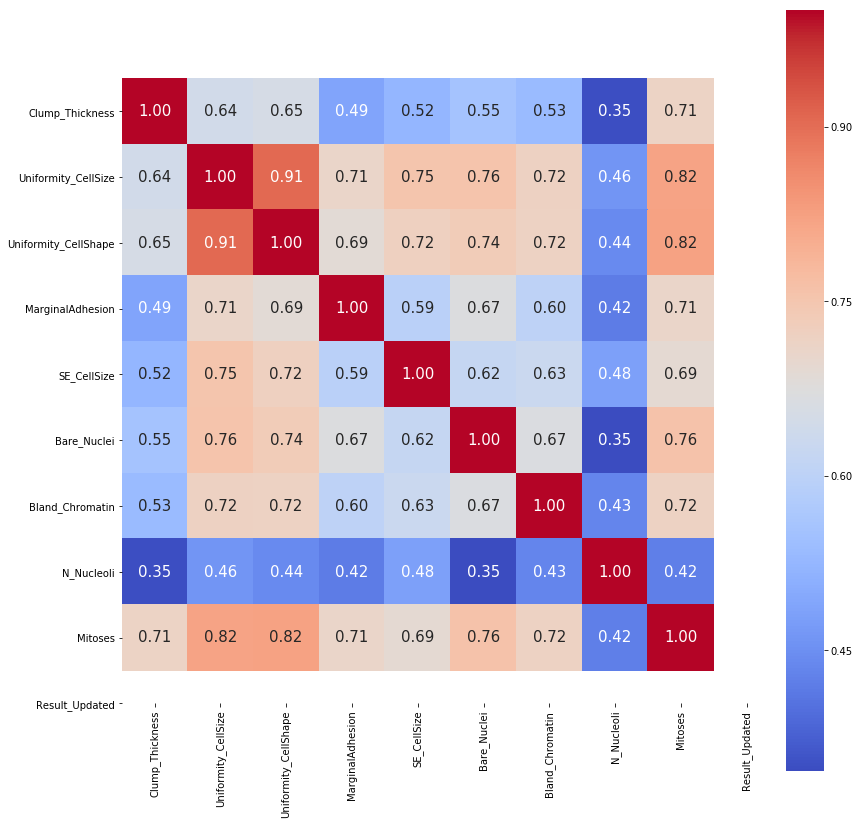

In [115]:
import matplotlib.pyplot as plt
corr = df.corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df.columns, yticklabels= df.columns,
           cmap= 'coolwarm')

In [116]:
df.drop(['Uniformity_CellShape'], axis = 1, inplace = True)
df['Bare_Nuclei'] = df['Bare_Nuclei'].astype(float)

In [117]:
# outlier treatment

# we could use the rule of thumb that tells all data should be within 3 sd's
import scipy 
from scipy import stats
df_cleaned = df[(np.abs(stats.zscore(df)) < 3).all(axis = 1)]

In [118]:
# we can
df_cleaned.shape

(632, 9)

In [119]:
df_cleaned.head()

,Clump_Thickness,Uniformity_CellSize,MarginalAdhesion,SE_CellSize,Bare_Nuclei,Bland_Chromatin,N_Nucleoli,Mitoses,Result_Updated
0,5,1,1,2,1.0,3,1,1,0
1,5,4,5,7,10.0,3,2,1,0
2,3,1,1,2,2.0,3,1,1,0
3,6,8,1,3,4.0,3,7,1,0
4,4,1,3,2,1.0,3,1,1,0


In [120]:
x = df_cleaned.drop(['Result_Updated'], axis = 1)
y = df_cleaned['Result_Updated']

In [121]:
import sklearn

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 3)

# LGBM

In [122]:
# the probemd at hand is binary classification problem

import lightgbm as lgbm

lgb = lgbm.LGBMClassifier(learning_rate=0.01, n_estimators=50, boosting_type= 'gbdt', max_depth= 3, num_leaves= 100, objective= 'binary', metrics = "auc",
                        random_state = 5)

lgb.fit(x_train, y_train)
predictions = lgb.predict(x_test)

C:\Users\saich\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [123]:
# calculating evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("AUC:", roc_auc_score(y_test, predictions))

Accuracy: 0.9291338582677166
Precision: 0.9714285714285714
Recall: 0.8095238095238095
AUC: 0.8988795518207283


In [124]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

array([[84,  1],
       [ 8, 34]], dtype=int64)

# logistic regression

In [125]:
from sklearn.linear_model import LogisticRegression

LogisticModel = LogisticRegression()

LogisticModel.fit(x_train,y_train)
predictions_Logistic = LogisticModel.predict(x_test)

In [126]:
print("Accuracy:", accuracy_score(y_test, predictions_Logistic))
print("Precision:", precision_score(y_test, predictions_Logistic))
print("Recall:", recall_score(y_test, predictions_Logistic))
print("AUC:", roc_auc_score(y_test, predictions_Logistic))

Accuracy: 0.968503937007874
Precision: 1.0
Recall: 0.9047619047619048
AUC: 0.9523809523809523


In [127]:
confusion_matrix(y_test, predictions_Logistic)

array([[85,  0],
       [ 4, 38]], dtype=int64)

# Random Forest

In [128]:
from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier(max_depth = 10, random_state = 5, n_estimators= 500)

RandomForest.fit(x_train, y_train)
predictions_random_forest = RandomForest.predict(x_test)

In [129]:
print("Accuracy:", accuracy_score(y_test, predictions_random_forest))
print("Precision:", precision_score(y_test, predictions_random_forest))
print("Recall:", recall_score(y_test, predictions_random_forest))
print("AUC:", roc_auc_score(y_test, predictions_random_forest))

Accuracy: 0.9606299212598425
Precision: 0.9512195121951219
Recall: 0.9285714285714286
AUC: 0.9525210084033613


In [130]:
confusion_matrix(y_test, predictions_random_forest)

array([[83,  2],
       [ 3, 39]], dtype=int64)

In [131]:
importances = RandomForest.feature_importances_

In [132]:
for name, importance in zip(x_train.columns, RandomForest.feature_importances_):
    print(name, "=", importance)

Clump_Thickness = 0.08603099182780169
Uniformity_CellSize = 0.2681161418276696
MarginalAdhesion = 0.0812496241778832
SE_CellSize = 0.09084702837136323
Bare_Nuclei = 0.21598980971829013
Bland_Chromatin = 0.1466002261559197
N_Nucleoli = 0.1010236325070676
Mitoses = 0.010142545414004988


In [133]:
d = []
for name, importance in zip(x_train.columns, RandomForest.feature_importances_):
    d.append(
        {
            'Variable': name,
            'Importance': importance,
        }
    )
temp = pd.DataFrame(d)

In [134]:
# sorted values of variable importances
temp.sort_values('Importance', ascending= False)

,Importance,Variable
1,0.268116,Uniformity_CellSize
4,0.215990,Bare_Nuclei
5,0.146600,Bland_Chromatin
6,0.101024,N_Nucleoli
3,0.090847,SE_CellSize
0,0.086031,Clump_Thickness
2,0.081250,MarginalAdhesion
7,0.010143,Mitoses
